# Documentation | Resilient Networks | Exercise 1

## Group Information
- Group Members: Luca Gebhardt, Jan Pfeifer
- Date: 10.11.2023



## Introduction
- In this exercise, we explore and analyze a directed and an undirected graph using Python and the igraph library. We present our data using Jupyter Notebook.

## Approach
### Step 1: Data Preparation
- We acquired the dataset located in the 'data' directory.
  - Gnutella09 (https://snap.stanford.edu/data/p2p-Gnutella09.html)
  - lastfm_asia (https://snap.stanford.edu/data/feather-lastfm-social.html)

Gnutella is a directed peer-to-peer network. It has 8,114 nodes and 26,013 edges.
Lastfm_asia is a undireced graph of a social network  It has 7600 nodes and 27806 edges.
We choose those two graphs because they are similarly sized and differ mainly in their direction.

### Step 2: Analysis and Interpretation
- We computed the following metrics for both graphs:
  - Average path length
  - Density
  - Average clustering coefficient
  - Distribution of clustering coefficient
  - Distribution of Cohesiveness
  - Edge persistence under greedy attack and random attack 
  
Finally, we interpret the metrics for both graphs and compare them with each other. The results are plotted using matplotlib.

## Analysis and Interpretation

### Gnutella | Directed Graph

In [2]:
# Generating the graph
import os
from src.GraphInput import TxtFileGraphInput
import matplotlib.pyplot as plt

notebook_dir = os.getcwd()

file_path = os.path.join(
    notebook_dir, "data/p2p-Gnutella09/p2p-Gnutella09.txt"
)

input = TxtFileGraphInput()
input.read_input_file_and_convert(file_path, directed=True)

In [3]:
# Density
print("Gnutella09 density: ", input.computed_density())

# Average Path Length
print("Gnutella09 average path length: ", input.compute_average_path_length())

# Average Clustering Coefficient
(
    average_clustering_coefficient,
    clustering_coefficient_distribution,
) = input.compute_clustering_coefficient()

print("Gnutella09 Average clustering coefficient: ", average_clustering_coefficient)

Gnutella09 density:  0.0003951608960942098


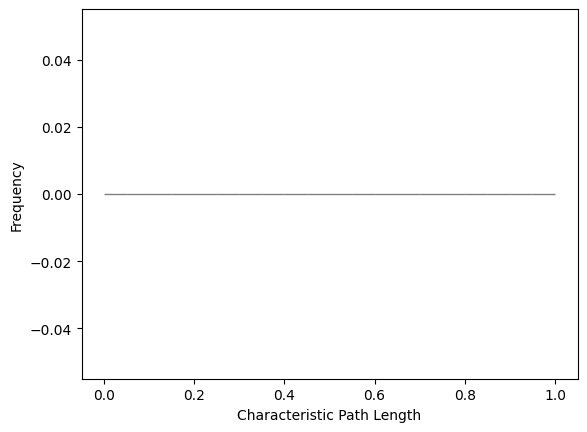

In [6]:
# Characteristic Path Length for all nodes
cpls = input.compute_cpl_for_all_nodes()

# Filter out infinite values from the cpls list
filtered_cpls = [cpl for cpl in cpls if cpl != float('inf')]

plt.hist(filtered_cpls, bins=20, alpha=0.5, color='b', edgecolor='k')
plt.xlabel('Characteristic Path Length')
plt.ylabel('Frequency')

plt.show()

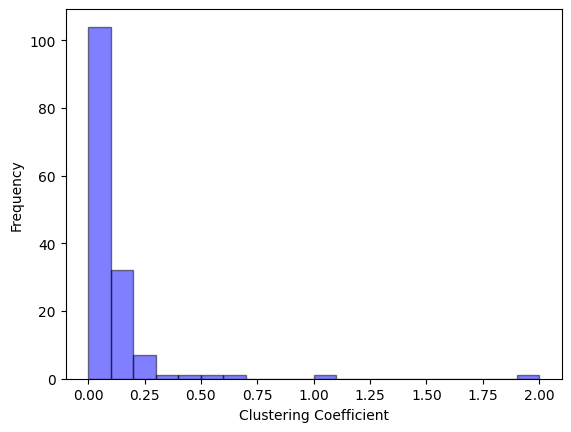

In [8]:
# Clustering Coefficient Distribution
values = list(clustering_coefficient_distribution.keys())
counts = list(clustering_coefficient_distribution.values())

plt.hist(values, bins=20, alpha=0.5, color='b', edgecolor='k')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')

plt.show()

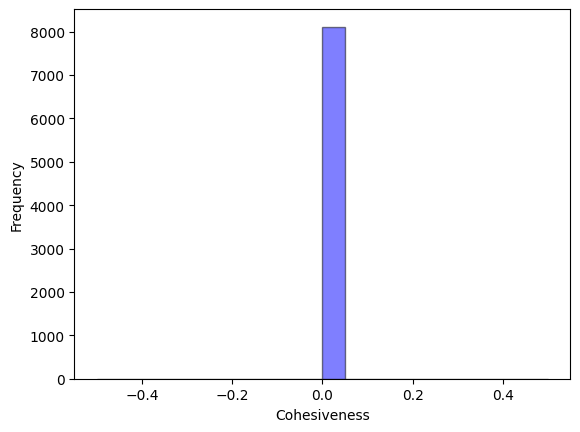

In [9]:
# Distribution of Cohesiveness
cohesiveness_values = input.compute_cohesiveness_for_each_node()
values = list(cohesiveness_values.values())

# Create a histogram plot for the cohesiveness values
plt.hist(values, bins=20, alpha=0.5, color='b', edgecolor='k')
plt.xlabel('Cohesiveness')
plt.ylabel('Frequency')

plt.show()

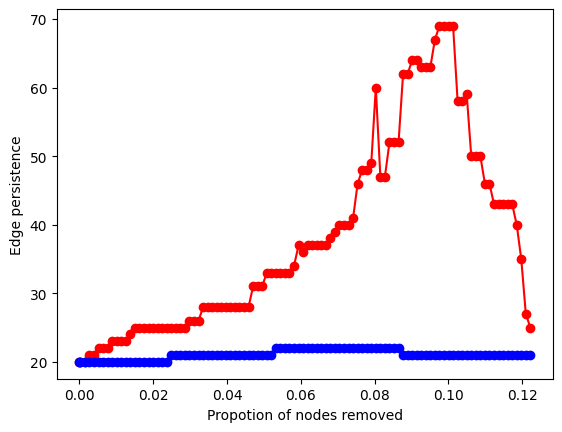

In [14]:
# Compute edge persistence under greedy attack
greedy_attack = input.compute_edge_persistence_under_greedy_attack()
random_attack = input.compute_edge_persistence_under_random_attack()

greedy_attack = (greedy_attack.items())
x,y = zip(*greedy_attack)
plt.plot(x,y, label='Edge persistence under greedy attack', color='r', marker='o')
random_attack = sorted(random_attack.items())
x,y = zip(*random_attack)
plt.plot(x,y, label='Edge persistence under random attack', color='b', marker='o')

plt.xlabel('Propotion of nodes removed')
plt.ylabel('Edge persistence')
plt.show()

#### Gnutella discussion

Gnutella has a density of 0.000395. A low density like this means that this graph is far away from being fully connected. In addition, the examined graph has an average path length of 7.05. Furthermore, the Gnutella graph has an average clustering coefficient of 0.073. Finally, the random and greedy attacks show that a greedy attack on the nodes with the highest degree are more effective than a random attack to increase the edge persistence. 

### lastfm_asia | Undirected Graph

In [15]:
# Generating the graph
import os
from src.GraphInput import CsvFileGraphInput
import matplotlib.pyplot as plt

notebook_dir = os.getcwd()

file_path = os.path.join(
    notebook_dir, "data/lastfm_asia/lastfm_asia_edges.csv"
)

input = CsvFileGraphInput()
input.read_input_file_and_convert(file_path, directed=False)

In [16]:
# Density
print("last_fm density: ", input.computed_density())

# Average Path Length
print("last_fm average path length: ", input.compute_average_path_length())

# Average Clustering Coefficient
(
    average_clustering_coefficient,
    clustering_coefficient_distribution,
) = input.compute_clustering_coefficient()

print("last_fm Average clustering coefficient: ", average_clustering_coefficient)

last_fm density:  0.0009568849118596329


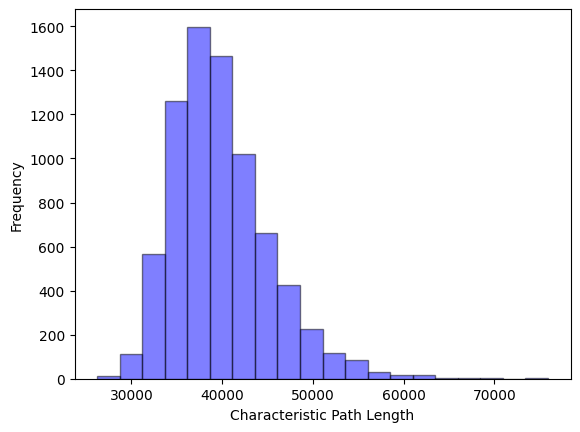

In [19]:
# Characteristic Path Length for all nodes
cpls = input.compute_cpl_for_all_nodes()

# Filter out infinite values from the cpls list
filtered_cpls = [cpl for cpl in cpls if cpl != float('inf')]

plt.hist(filtered_cpls, bins=20, alpha=0.5, color='b', edgecolor='k')
plt.xlabel('Characteristic Path Length')
plt.ylabel('Frequency')

plt.show()

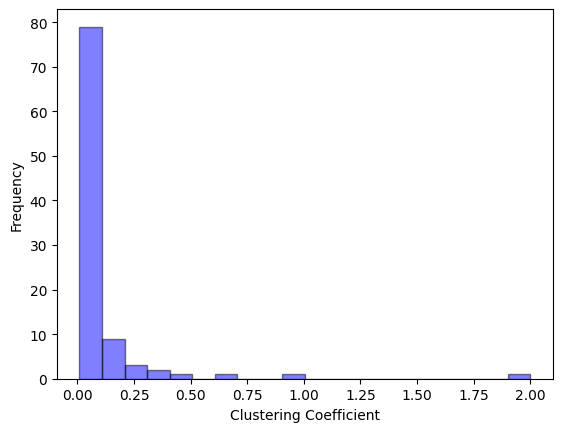

In [21]:
# Clustering Coefficient Distribution
values = list(clustering_coefficient_distribution.keys())
counts = list(clustering_coefficient_distribution.values())

plt.hist(values, bins=20, alpha=0.5, color='b', edgecolor='k')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')

plt.show()

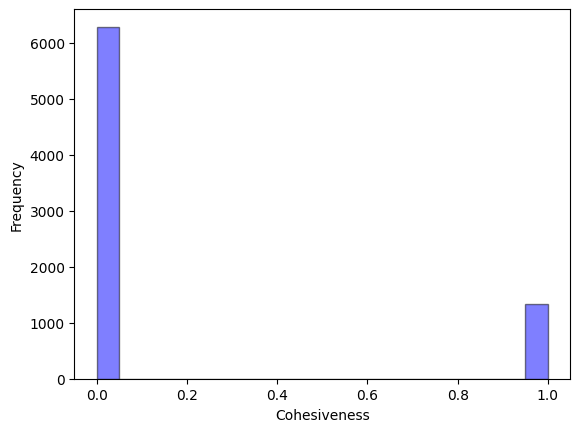

In [22]:
# Distribution of Cohesiveness
cohesiveness_values = input.compute_cohesiveness_for_each_node()
values = list(cohesiveness_values.values())

plt.hist(values, bins=20, alpha=0.5, color='b', edgecolor='k')
plt.xlabel('Cohesiveness')
plt.ylabel('Frequency')

plt.show()

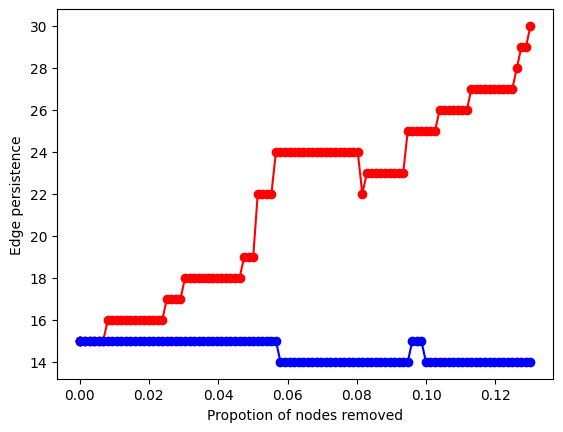

In [24]:
# Compute edge persistence under greedy attack
greedy_attack = input.compute_edge_persistence_under_greedy_attack()
random_attack = input.compute_edge_persistence_under_random_attack()

greedy_attack = (greedy_attack.items())
x,y = zip(*greedy_attack)
plt.plot(x,y, label='Edge persistence under greedy attack', color='r', marker='o')
random_attack = sorted(random_attack.items())
x,y = zip(*random_attack)
plt.plot(x,y, label='Edge persistence under random attack', color='b', marker='o')

plt.xlabel('Propotion of nodes removed')
plt.ylabel('Edge persistence')
plt.show()

#### Lastfm Discussion

## Conclusion
- Graphs are cool but can be quite complex.